<a href="https://colab.research.google.com/github/Techbae22/Association-Rules/blob/main/Association_rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Apriori Situation**

In [6]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

**Apriori Library**

In [7]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


**Support Code**

In [8]:
#apriori() function evaluates support value for each product.
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6)

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


**Support with Column Names**

In [9]:
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Pants, Skirt)"


Support value gives us these information:


* 60 percent of 100 purchases are "Hat"

* 80 percent of 100 purchases are "Pants"

* 80 percent of 100 purchases are "Scarf"

* 60 percent of 100 purchases are "Skirt"

* 60 percent of 100 purchases are "Scarf" and "Pants"

* 60 percent of 100 purchases are "Pants" and "Skirt"

**Confidence Code**

In [10]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate itemsets with confidence over 70%.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf



* Antecedent support variable tells us probability of antecedent products alone.

* Consequents support variable tells us probability of consequents products alone.

* Support quantifies how many times an item or an itemset appear in a set of transactions. For example, 60% of transactions contain "Scarf" and "Pants".

* Confidence: After buying item X what’s the probability of buying item Y. For example, 75% of transactions containing "Scarf" have "Pants".

**Lift Code**

In [11]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


Lift: What’s the probability of buying items X and Y together rather than just buying item X. For example, it's more likely to buy "Skirt" and "Pants" together rather than "Skirt" alone. So, it's better to put "Pants" next to "Skirts".

**Load our data file**

In [12]:
#Setup initial libraries
import pandas as pd

In [14]:
#Import dataset
df= pd.read_csv("Market_Basket_Optimisation.csv", delimiter= ",", header= None)

In [15]:
#Show the head of the dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Data Visualization**

In [16]:
import numpy as np

In [17]:
df_res = pd.DataFrame()
for i in range(len(df.columns)):
    df_res = df_res.append(df[i].value_counts()) 
df_res.head(5)

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,cauliflower,ketchup,cream,body spray,oatmeal,tea,water spray,zucchini,napkins,asparagus
0,577.0,576.0,458.0,391.0,373.0,354.0,325.0,293.0,279.0,270.0,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,484.0,78.0,11.0,223.0,234.0,411.0,153.0,78.0,302.0,101.0,...,1.0,5.0,1.0,13.0,4.0,5.0,1.0,10.0,NaN,NaN
2,375.0,NaN,NaN,174.0,87.0,279.0,48.0,21.0,225.0,50.0,...,1.0,2.0,1.0,14.0,5.0,4.0,1.0,2.0,NaN,NaN
3,201.0,NaN,NaN,143.0,18.0,167.0,9.0,1.0,181.0,55.0,...,3.0,6.0,1.0,9.0,6.0,1.0,1.0,9.0,1.0,NaN
4,84.0,NaN,NaN,115.0,2.0,62.0,NaN,NaN,134.0,45.0,...,4.0,3.0,1.0,15.0,2.0,4.0,NaN,17.0,2.0,NaN


In the above, I decided to count all unique values through all columns and build some visualizations.

In [18]:
df_sum = df_res.sum()
df_sum = df_sum.sort_values(ascending=False)
df_sum

mineral water    1788.0
eggs             1348.0
spaghetti        1306.0
french fries     1282.0
chocolate        1230.0
                  ...  
bramble            14.0
cream               7.0
napkins             5.0
water spray         3.0
 asparagus          1.0
Length: 120, dtype: float64

After counting all values through all columns, we can build a frequency plot.

In [19]:
import matplotlib.pyplot as plt

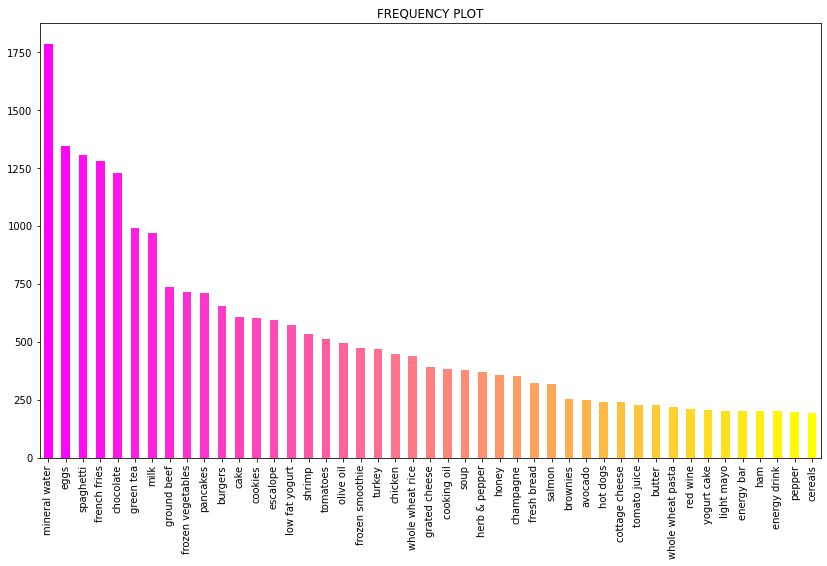

In [20]:
plt.figure(figsize=(14,8))
plt.title("FREQUENCY PLOT")
cnt = 45 # plot only first 'cnt' values
color = plt.cm.spring(np.linspace(0, 1, cnt))
df_sum.head(cnt).plot.bar(color = color)
plt.xticks(rotation = 'vertical')
plt.grid(False)
plt.axis('on')
plt.show()

We can also use a heat map

In [22]:
!pip install squarify

In [23]:
import squarify

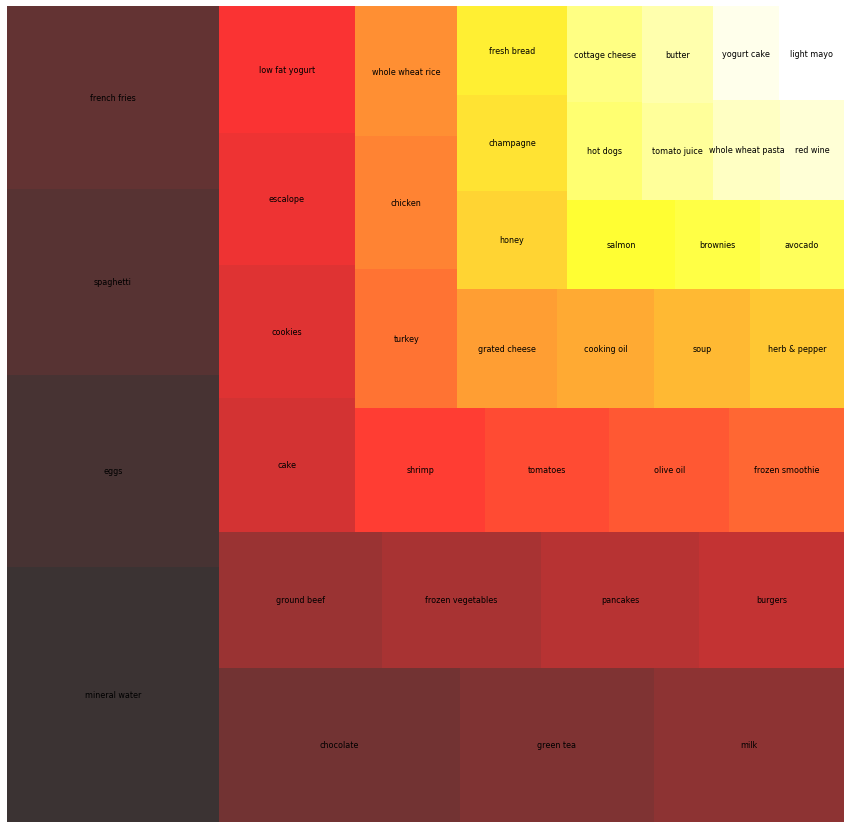

In [24]:
plt.figure(figsize=(15,15))
cnt = 40 # plot only first 'cnt' values
color = plt.cm.hot(np.linspace(0, 1, cnt))
df_part = df_sum.head(cnt)
squarify.plot(sizes = df_part.values, label = df_part.index, alpha=.8, color = color, text_kwargs={'fontsize':8})
plt.axis('off')
plt.show()

**Apriori Preparation**

Before we convert the dataset to a transaction view, we should convert pandas-data to list-data and then list-data to numpy-data.



**Making each customer's transaction an identical list**

In [25]:
arr = []
for i in range(df.shape[0]):
    arr.append([str(df.values[i,j]) for j in range(df.shape[1])])

arr = np.array(arr)

In [26]:
#Converting our dataset to transaction view
te = TransactionEncoder()
data = te.fit_transform(arr)
data = pd.DataFrame(data, columns = te.columns_)
data

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
#Drop missing values
data = data.drop(columns=['nan'])
data.head(5)

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


**Support Code**


Now we will be using Apriori rule to find some dependencies.

In [28]:
freq_rules = apriori(data, min_support = 0.01, use_colnames = True)
freq_rules

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(ground beef, mineral water, milk)"
253,0.017064,"(ground beef, spaghetti, mineral water)"
254,0.015731,"(spaghetti, mineral water, milk)"
255,0.010265,"(spaghetti, mineral water, olive oil)"


In [29]:
#Getting itemsets' lengths
freq_rules['length'] = freq_rules['itemsets'].apply(lambda x: len(x))
freq_rules

,support,itemsets,length
0,0.020397,(almonds),1
1,0.033329,(avocado),1
2,0.010799,(barbecue sauce),1
3,0.014265,(black tea),1
4,0.011465,(body spray),1
...,...,...,...
252,0.011065,"(ground beef, mineral water, milk)",3
253,0.017064,"(ground beef, spaghetti, mineral water)",3
254,0.015731,"(spaghetti, mineral water, milk)",3
255,0.010265,"(spaghetti, mineral water, olive oil)",3


In [31]:
#Getting itemsets with length= 2 and support more than 5%
freq_rules[ (freq_rules['length'] == 2) &
                   (freq_rules['support'] >= 0.05) ]

,support,itemsets,length
118,0.052660,"(chocolate, mineral water)",2
144,0.050927,"(eggs, mineral water)",2
224,0.059725,"(spaghetti, mineral water)",2


In [32]:
#Getting itemsets with length= 1 and support more than 5%
freq_rules[ (freq_rules['length'] == 1) &
                   (freq_rules['support'] >= 0.05) ]

,support,itemsets,length
6,0.087188,(burgers),1
8,0.081056,(cake),1
12,0.059992,(chicken),1
13,0.163845,(chocolate),1
15,0.080389,(cookies),1
16,0.051060,(cooking oil),1
19,0.179709,(eggs),1
22,0.079323,(escalope),1
24,0.170911,(french fries),1
29,0.063325,(frozen smoothie),1


**Confidence Code**

In [33]:
rules = association_rules(freq_rules, metric="lift", min_threshold=1.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
158,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,1,1
159,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,1,1
326,"(spaghetti, mineral water)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445,2,1
327,(ground beef),"(spaghetti, mineral water)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,1,2
341,(olive oil),"(spaghetti, mineral water)",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898,1,2
...,...,...,...,...,...,...,...,...,...,...,...
100,(eggs),(low fat yogurt),0.179709,0.076523,0.016798,0.093472,1.221484,0.003046,1.018696,1,1
152,(shrimp),(green tea),0.071457,0.132116,0.011465,0.160448,1.214449,0.002025,1.033747,1,1
153,(green tea),(shrimp),0.132116,0.071457,0.011465,0.086781,1.214449,0.002025,1.016780,1,1
109,(french fries),(escalope),0.170911,0.079323,0.016398,0.095944,1.209537,0.002841,1.018385,1,1


From the above table, we can easily say that the dependency between (herb & pepper) and (ground beef) is high since lift score is approximately 2.5x of threshold and the confidence score is promising (32%).

In [34]:
#Sort values based on confidence
rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
284,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,2,1
319,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,2,1
260,"(ground beef, chocolate)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,2,1
307,"(frozen vegetables, milk)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136,2,1
214,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,1,1
...,...,...,...,...,...,...,...,...,...,...,...
209,(mineral water),(red wine),0.238368,0.028130,0.010932,0.045861,1.630358,0.004227,1.018584,1,1
340,(mineral water),"(spaghetti, olive oil)",0.238368,0.022930,0.010265,0.043065,1.878079,0.004799,1.021041,1,2
38,(mineral water),(cereals),0.238368,0.025730,0.010265,0.043065,1.673729,0.004132,1.018115,1,1
305,(mineral water),"(french fries, spaghetti)",0.238368,0.027596,0.010132,0.042506,1.540263,0.003554,1.015571,1,2


From the above table, the customer who bought (eggs, ground beef) is expected to buy (mineral water) with a likelihood of 50% (confidence). Lift & conviction scores support that hypothesis too and it would be better to keep them close to increase sales